# Project: Employee Absenteeism
## Author: Venkat Deepak Garlapati
## Language: Python

In [1]:
#Changing working Directory
import os
os.chdir("/Users/Deepak Garlapati/Documents/R")
os.getcwd()

'C:\\Users\\Deepak Garlapati\\Documents\\R'

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN  
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import math

Using TensorFlow backend.


In [3]:
#Importing Data set 
data = pd.read_excel("Absenteeism_at_work.xls")

#Remove restriction on showing max columns 
pd.set_option('display.max_columns',None)

In [4]:
#Previewing the data
data.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [5]:
#Shape of the data
data.shape

(740, 21)

In [6]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [7]:
# Assigning independent and dependent variables
X = data.iloc[:,:-1].values
y = data.iloc[:,20].values

In [8]:
#Hypothesis Creation

#1. Leave rate is more for sick compared to causal leaves and blood donations
#2. Usually people takes more leaves in Rainy season.
#3. People having no discipline takes more leaves (Excluded people who fell sick)
#4. When comes to Education, usually people who are less educated takes more.
#5. Drinkers and Smokers might take more compared to non Drinkers and non Smokers.
#6. People with more weight works lazy.
#7. Usually employees take a complete day off due to sick or takes 2/3 hours for consulting doctors/donating blood etc.,

## Data Pre-Processing

### Missing Value Analysis

In [10]:
# Missing Values Check

missing_values = pd.DataFrame(data.isna().sum())
missing_values = missing_values.reset_index()
missing_values = missing_values.rename(columns={'index':'Variable',0:'No. of Missing Values'})

missing_values_in_percentage = missing_values
missing_values_in_percentage['No. of Missing Values'] = (missing_values_in_percentage['No. of Missing Values']/len(data)) * 100
missing_values_in_percentage = missing_values_in_percentage.rename(columns={'Variable':'Variable','No. of Missing Values':'No. of Missing Values in % '})
missing_values_in_percentage


,Variable,No. of Missing Values in %
0,ID,0.000000
1,Reason for absence,0.405405
2,Month of absence,0.135135
3,Day of the week,0.000000
4,Seasons,0.000000
5,Transportation expense,0.945946
6,Distance from Residence to Work,0.405405
7,Service time,0.405405
8,Age,0.405405
9,Work load Average/day,1.351351


In [11]:
#Imputing missing values as the missing percentage is less then 30%, as there will be negligible effect on our model.

In [12]:
#Procedure:

#Steps:
#1. First we take sub data without missing values.
#2. Remove some values from the sub data randomly.
#3. Perfrom different missing value imputations(0, mean, median, mode, KNN, OLS)
#4. Compare with Original Values 
#5. Choose the best fit.


In [13]:
# Comparing different missing value Imputations

#At data_tmp['Reason for absence'].loc[43]

# Actual Value: 19.0
# Mean: 19.1888576553816
# Median: 23.0
# Mode: 23.0
# KNN(k=3): 18.985337031267903, KNN(k=5):16.546639814368195
# OLS: 

#At data_tmp['Reason for absence'].loc[72]

# Actual Value: 23.0
# Mean: 19.183423913043477
# Median: 23.0
# Mode: 23.0
# KNN(k=3): 23.06142547987882, KNN(k=5): 23.0606445646363
# OLS: 

#From the observations above, we choose KNN imputation with k=3 for imputing missing values as it is very close to the
#actual value

In [14]:
#Performing operations on temporary data to avoid changes in Original Data.
data_tmp = data
tmp_cols = list(data)

In [15]:
# Making a value null in a column randomly
#data_tmp['Reason for absence'].loc[43]
#data_tmp['Reason for absence'].loc[43] = np.nan

In [16]:
#Imputing with Mean
#data_tmp['Reason for absence'] = data_tmp['Reason for absence'].fillna(data_tmp['Reason for absence'].mean())

#Imputing with Median
#data_tmp['Reason for absence'] = data_tmp['Reason for absence'].fillna(data_tmp['Reason for absence'].median())

#Imputing with Mode
#data_tmp['Reason for absence'] = data_tmp['Reason for absence'].fillna(data_tmp['Reason for absence'].mode()[0])

#Imputing with KNN
data_tmp = pd.DataFrame(KNN(k=3).fit_transform(data_tmp),columns = tmp_cols)
#data_tmp.columns = tmp_cols

Imputing row 1/740 with 0 missing, elapsed time: 0.485
Imputing row 101/740 with 1 missing, elapsed time: 0.487
Imputing row 201/740 with 0 missing, elapsed time: 0.488
Imputing row 301/740 with 0 missing, elapsed time: 0.489
Imputing row 401/740 with 0 missing, elapsed time: 0.490
Imputing row 501/740 with 0 missing, elapsed time: 0.490
Imputing row 601/740 with 0 missing, elapsed time: 0.491
Imputing row 701/740 with 0 missing, elapsed time: 0.491


In [17]:
#Imputing with OLS


### Duplicate Value Check

In [18]:
# Check Duplicate Values
dup = data_tmp.duplicated()
sum(dup)

29

In [19]:
#Drop Duplicate values
data_tmp.loc[data_tmp.duplicated(),:]
data_tmp = data_tmp.drop_duplicates()


In [20]:
#Applying changes to original data
data = data_tmp

In [21]:
# Seperating numerical and categorical variables.
num_vars = ['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ',
            'Hit target','Height','Weight','Body mass index','Absenteeism time in hours']

data_cat = data[[c for c in data.columns if c not in num_vars]]

cat_vars = list(data_cat)

### Outliers Check

In [22]:
#Removing outliers from the continuous variables and Imputing them with KNN algorithm.

In [23]:
def impute_outliers(data):   
    for i in num_vars:
        
        # Calculating 25th quartile and 75th quartile.
        q75,q25 = np.percentile(data.loc[:,i],[75,25])
        iqr = q75 - q25
        
        min = q25 - (1.5*iqr)
        max = q75 + (1.5*iqr)
        
        # Plotting data with outliers
        plt.figure()
        sns.boxplot(data[i]).set_title('Distribution of ' + i )
        
        # Convert outlier Values to NaN
        data.loc[data.loc[:,i] < min, i] = np.nan
        data.loc[data.loc[:,i] > max, i] = np.nan
        
    #Imputing missing values with KNN    
    data = pd.DataFrame(KNN(k=3).fit_transform(data),columns = tmp_cols)
    
    for i in num_vars:    
        plt.figure()
        sns.boxplot(data[i]).set_title('Distribution of ' + i + " after imputing outliers")     

In [24]:
#impute_outliers(data)  



## Exploratory Data Analysis

In [25]:
data_tmp = data

### Data Visualisations

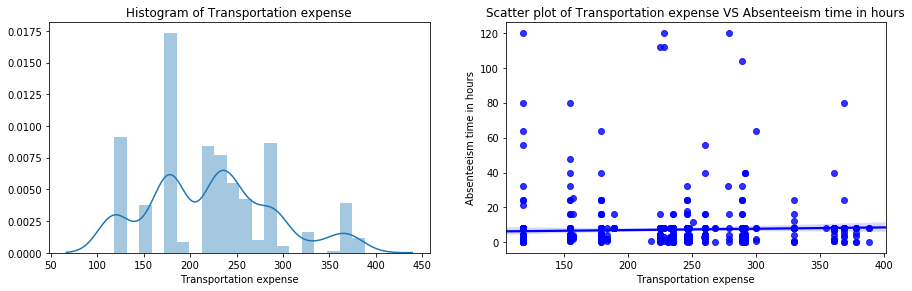

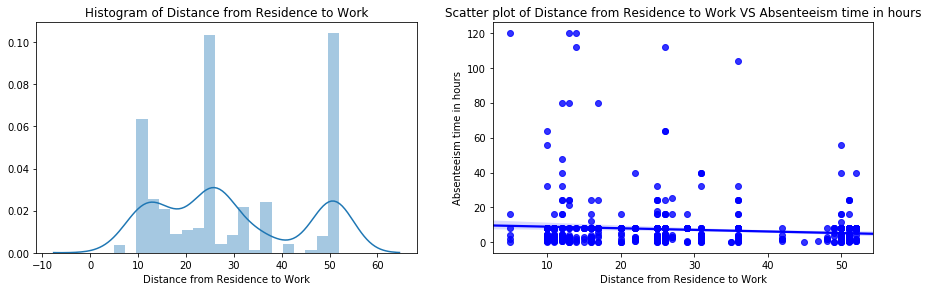

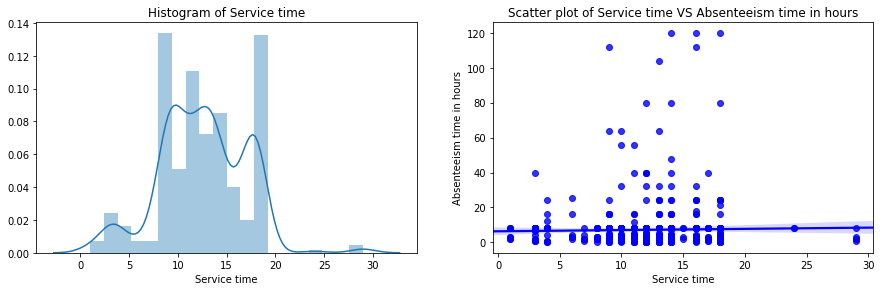

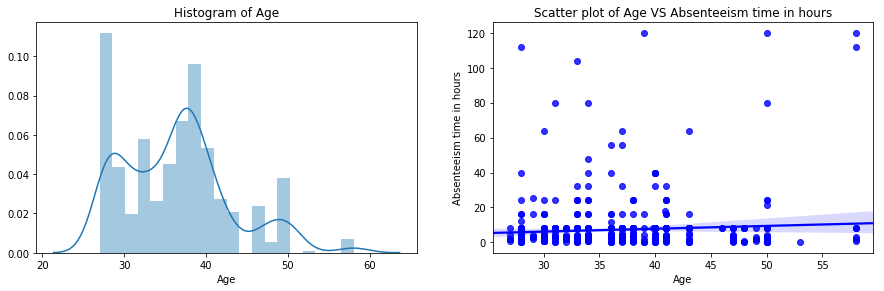

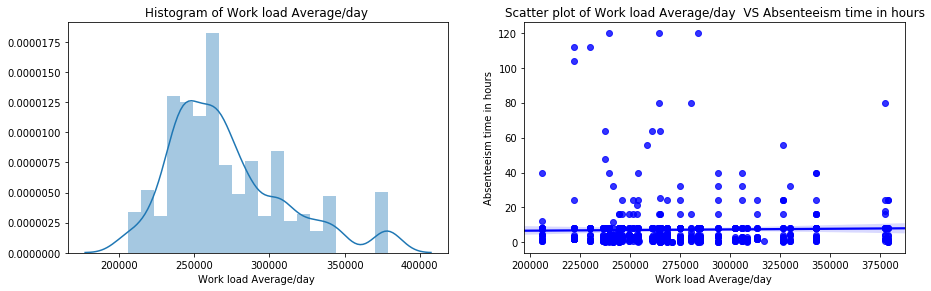

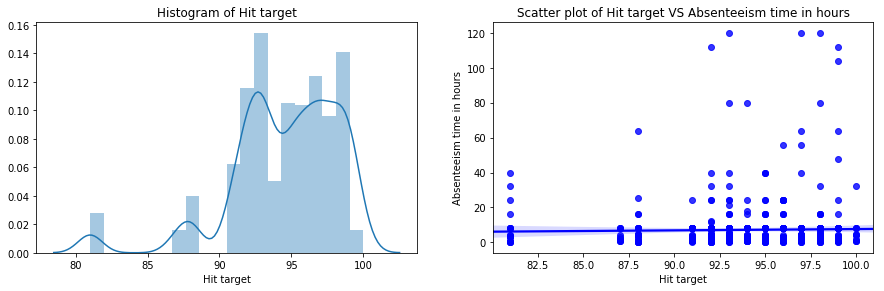

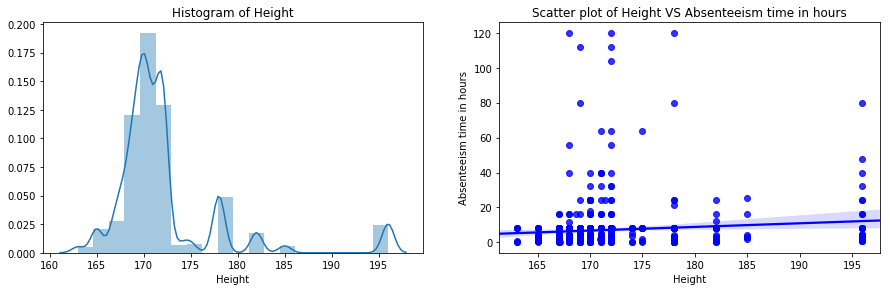

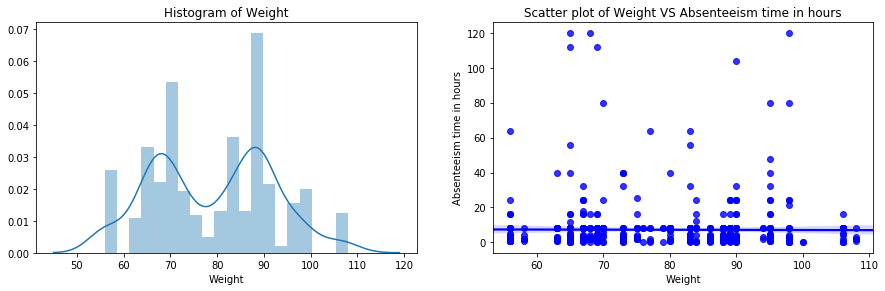

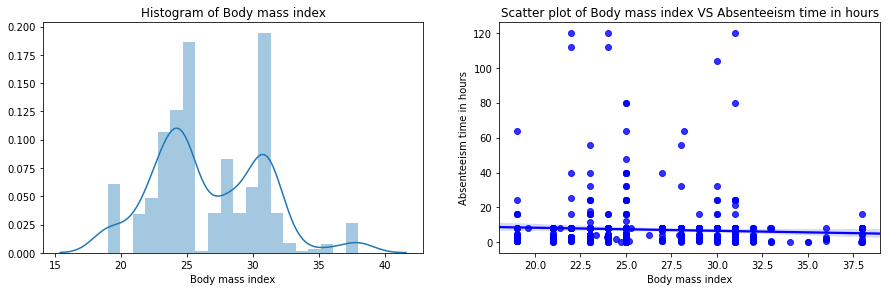

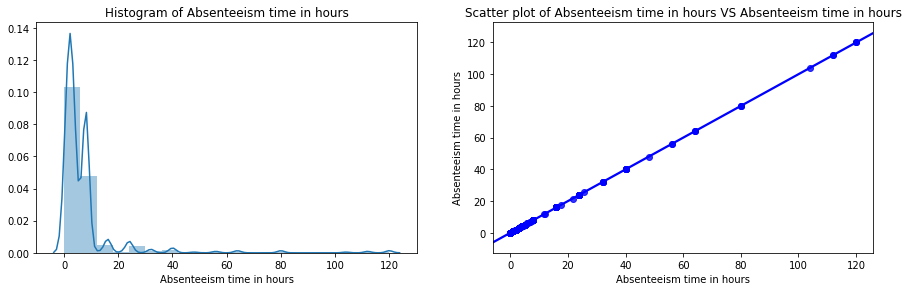

In [26]:
# On continuous variables
z = 1
for i in num_vars:   
    
    # Uni-Variate Analysis
    plt.figure(figsize=(15,50))
    ax1 = plt.subplot(len(num_vars),2,z)
    sns.distplot(data[i],bins = 20,ax = ax1)
    ax1.set_title("Histogram of " + i )
    z = z + 1    

    # Bi-Variate Analysis
    ax2 = plt.subplot(len(num_vars),2,z)
    sns.regplot(data[i],data["Absenteeism time in hours"],ax = ax2,color='b')
    ax2.set_title("Scatter plot of " + i + " VS Absenteeism time in hours")
    z = z + 1


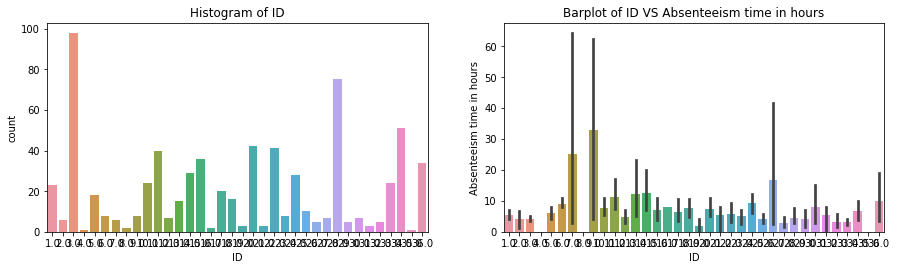

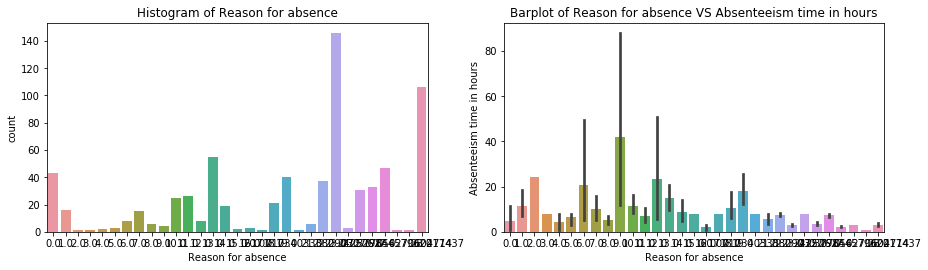

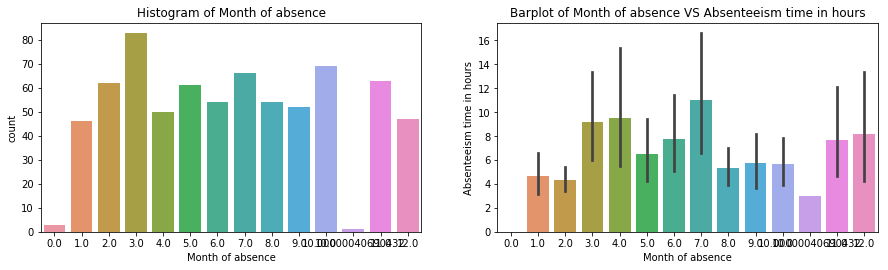

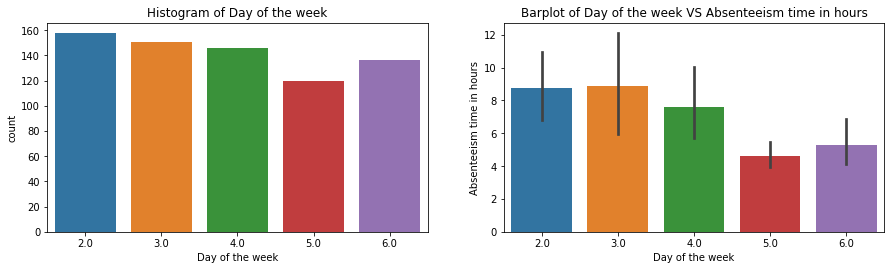

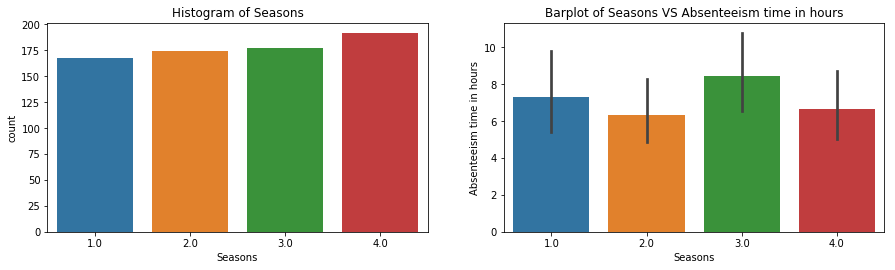

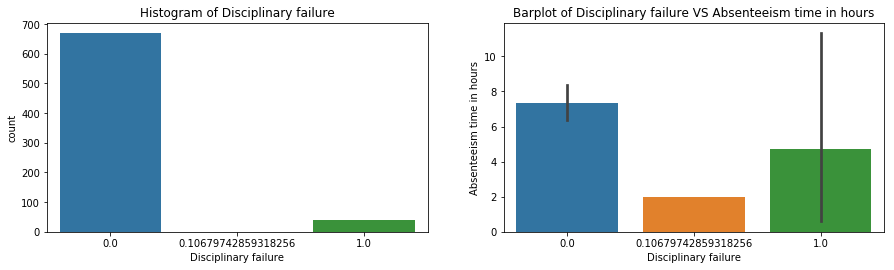

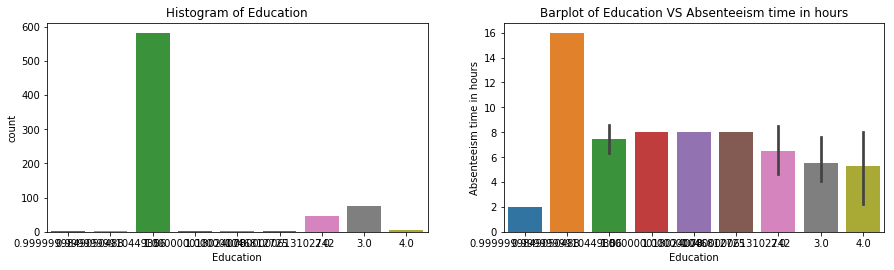

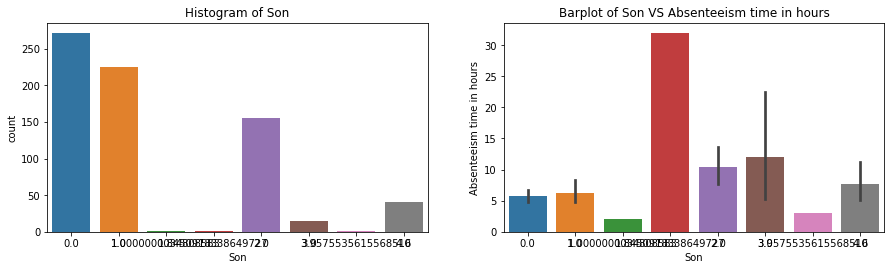

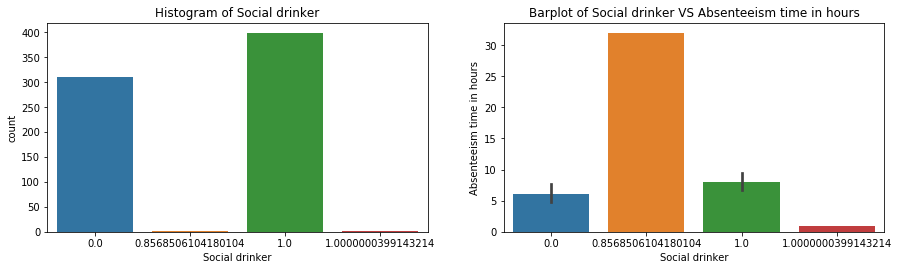

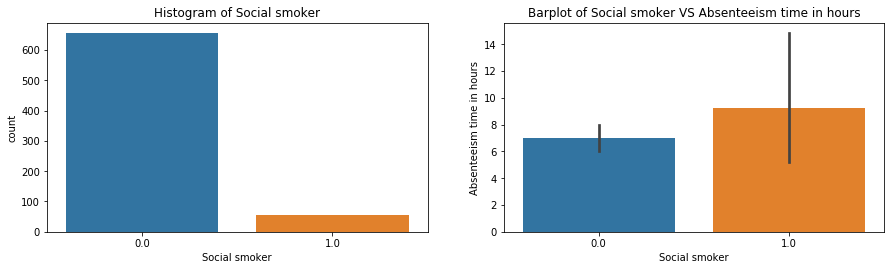

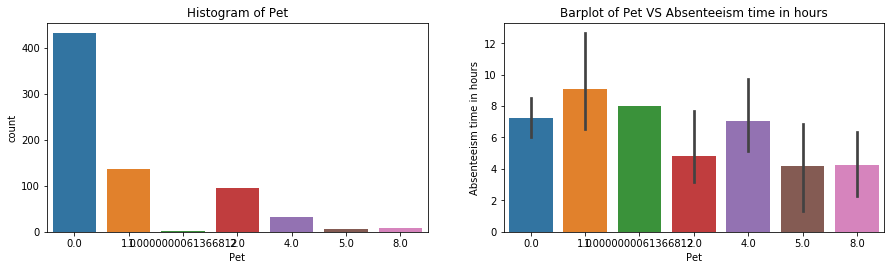

In [27]:
from matplotlib.ticker import Formatter
# On categorical variables
z = 1
for i in cat_vars:
    
    # Uni-Variate Analysis
    plt.figure(figsize=(15,50))
    plt.subplot(len(cat_vars),2,z)
    ax = sns.countplot(data[i])
    ax.set_title("Histogram of " + i )
    z = z + 1
    
    # Bi-Variate Analysis
    plt.subplot(len(cat_vars),2,z)
    ax = sns.barplot(data[i],data["Absenteeism time in hours"])
   # ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.set_title("Barplot of "+i+" VS Absenteeism time in hours")
    z = z + 1


## Feature Engineering

### Handling Categorical variables

In [28]:
# from sklearn.preprocessing import OneHotEncoder

# X_data = data.iloc[:,:-1]
# X = data.iloc[:,:-1].values
# cat_mask = []

# for column_name in list(X_data.columns.values):
#          cat_mask.append(column_name in cat_vars)  
# ohe = OneHotEncoder(categorical_features = cat_mask, sparse = False)
# X = ohe.fit_transform(X)

# X = pd.DataFrame(X)
# X.head()

In [29]:
for column in cat_vars:
    data = pd.concat([data,pd.get_dummies(data[column],drop_first = True, prefix = column)],axis = 1)  
    data.drop(column,axis = 1,inplace=True)


In [30]:
data.shape

(711, 122)

In [38]:
data.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours,ID_2.0,ID_3.0,ID_4.0,ID_5.0,ID_6.0,ID_7.0,ID_8.0,ID_9.0,ID_10.0,ID_11.0,ID_12.0,ID_13.0,ID_14.0,ID_15.0,ID_16.0,ID_17.0,ID_18.0,ID_19.0,ID_20.0,ID_21.0,ID_22.0,ID_23.0,ID_24.0,ID_25.0,ID_26.0,ID_27.0,ID_28.0,ID_29.0,ID_30.0,ID_31.0,ID_32.0,ID_33.0,ID_34.0,ID_35.0,ID_36.0,Reason for absence_1.0,Reason for absence_2.0,Reason for absence_3.0,Reason for absence_4.0,Reason for absence_5.0,Reason for absence_6.0,Reason for absence_7.0,Reason for absence_8.0,Reason for absence_9.0,Reason for absence_10.0,Reason for absence_11.0,Reason for absence_12.0,Reason for absence_13.0,Reason for absence_14.0,Reason for absence_15.0,Reason for absence_16.0,Reason for absence_17.0,Reason for absence_18.0,Reason for absence_19.0,Reason for absence_20.071734033382903,Reason for absence_21.0,Reason for absence_22.0,Reason for absence_23.0,Reason for absence_24.0,Reason for absence_25.0,Reason for absence_26.0,Reason for absence_27.0,Reason for absence_27.377656270604714,Reason for absence_27.984457962217437,Reason for absence_28.0,Month of absence_1.0,Month of absence_2.0,Month of absence_3.0,Month of absence_4.0,Month of absence_5.0,Month of absence_6.0,Month of absence_7.0,Month of absence_8.0,Month of absence_9.0,Month of absence_10.0,Month of absence_10.00000040690432,Month of absence_11.0,Month of absence_12.0,Day of the week_3.0,Day of the week_4.0,Day of the week_5.0,Day of the week_6.0,Seasons_2.0,Seasons_3.0,Seasons_4.0,Disciplinary failure_0.10679742859318256,Disciplinary failure_1.0,Education_0.9999999910449356,Education_1.0,Education_1.000000018024078,Education_1.000000046812725,Education_1.0000000613102742,Education_2.0,Education_3.0,Education_4.0,Son_1.0,Son_1.0000000034808583,Son_1.8450918338649727,Son_2.0,Son_3.0,Son_3.9575535615568516,Son_4.0,Social drinker_0.8568506104180104,Social drinker_1.0,Social drinker_1.0000000399143214,Social smoker_1.0,Pet_1.0,Pet_1.0000000061366812,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0
0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.653846,0.272727,0.578947,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,0.807692,0.454545,0.631579,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.634615,0.212121,0.631579,0.016667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.230769,0.151515,0.263158,0.033333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

### Feature Scaling

In [31]:
# Normalizing the features

for i in list(data):
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [32]:
data.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours,ID_2.0,ID_3.0,ID_4.0,ID_5.0,ID_6.0,ID_7.0,ID_8.0,ID_9.0,ID_10.0,ID_11.0,ID_12.0,ID_13.0,ID_14.0,ID_15.0,ID_16.0,ID_17.0,ID_18.0,ID_19.0,ID_20.0,ID_21.0,ID_22.0,ID_23.0,ID_24.0,ID_25.0,ID_26.0,ID_27.0,ID_28.0,ID_29.0,ID_30.0,ID_31.0,ID_32.0,ID_33.0,ID_34.0,ID_35.0,ID_36.0,Reason for absence_1.0,Reason for absence_2.0,Reason for absence_3.0,Reason for absence_4.0,Reason for absence_5.0,Reason for absence_6.0,Reason for absence_7.0,Reason for absence_8.0,Reason for absence_9.0,Reason for absence_10.0,Reason for absence_11.0,Reason for absence_12.0,Reason for absence_13.0,Reason for absence_14.0,Reason for absence_15.0,Reason for absence_16.0,Reason for absence_17.0,Reason for absence_18.0,Reason for absence_19.0,Reason for absence_20.071734033382903,Reason for absence_21.0,Reason for absence_22.0,Reason for absence_23.0,Reason for absence_24.0,Reason for absence_25.0,Reason for absence_26.0,Reason for absence_27.0,Reason for absence_27.377656270604714,Reason for absence_27.984457962217437,Reason for absence_28.0,Month of absence_1.0,Month of absence_2.0,Month of absence_3.0,Month of absence_4.0,Month of absence_5.0,Month of absence_6.0,Month of absence_7.0,Month of absence_8.0,Month of absence_9.0,Month of absence_10.0,Month of absence_10.00000040690432,Month of absence_11.0,Month of absence_12.0,Day of the week_3.0,Day of the week_4.0,Day of the week_5.0,Day of the week_6.0,Seasons_2.0,Seasons_3.0,Seasons_4.0,Disciplinary failure_0.10679742859318256,Disciplinary failure_1.0,Education_0.9999999910449356,Education_1.0,Education_1.000000018024078,Education_1.000000046812725,Education_1.0000000613102742,Education_2.0,Education_3.0,Education_4.0,Son_1.0,Son_1.0000000034808583,Son_1.8450918338649727,Son_2.0,Son_3.0,Son_3.9575535615568516,Son_4.0,Social drinker_0.8568506104180104,Social drinker_1.0,Social drinker_1.0000000399143214,Social smoker_1.0,Pet_1.0,Pet_1.0000000061366812,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0
0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.653846,0.272727,0.578947,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,0.807692,0.454545,0.631579,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.634615,0.212121,0.631579,0.016667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.230769,0.151515,0.263158,0.033333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

### Feature Selection

### Splitting the data

In [54]:
X_train = data.drop('Absenteeism time in hours',axis =1 )
y_train = data['Absenteeism time in hours']

### PCA Visualisation of the data

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
y_pca = pca.fit_transform(X_train)
y_pca

array([[-0.62843383, -0.38162676],
       [-0.44292816,  0.35375053],
       [-0.75081939, -0.16398956],
       ...,
       [-0.31179039,  0.32924006],
       [-0.39219188, -0.76373573],
       [ 0.10627589,  0.14213438]])

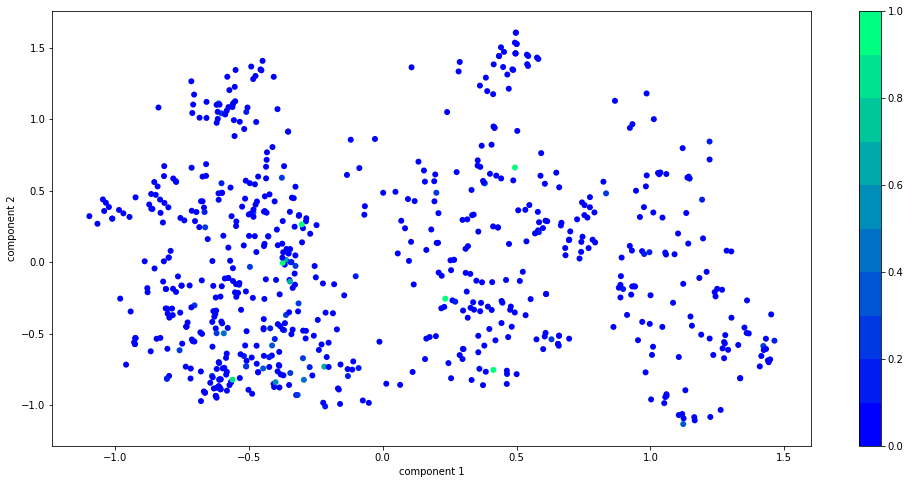

In [66]:
plt.scatter(y_pca[:, 0], y_pca[:, 1], c = y_train, edgecolor = 'none', cmap = plt.get_cmap('winter',10))

plt.xlabel('component 1')
plt.ylabel('component 2')

plt.gcf().set_size_inches((17,8))
plt.colorbar();

#### Inference : 
From the above plot, we can observe that there are three cluster of points and concentrated around a space.

#### Removing highly correlated Features

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Weight,Body mass index,Absenteeism time in hours
Transportation expense,1.000000,0.279693,-0.354836,-0.235395,-0.006073,-0.073741,-0.200763,-0.210050,-0.135242,0.037925
Distance from Residence to Work,0.279693,1.000000,0.092837,-0.160006,-0.056538,-0.036390,-0.355782,-0.077530,0.088199,-0.100191
Service time,-0.354836,0.092837,1.000000,0.674898,0.029601,-0.020317,-0.045195,0.447164,0.486772,0.022526
Age,-0.235395,-0.160006,0.674898,1.000000,-0.034785,-0.038149,-0.061660,0.412810,0.464760,0.079131
Work load Average/day,-0.006073,-0.056538,0.029601,-0.034785,1.000000,-0.079899,0.101401,-0.039084,-0.097368,0.020954
Hit target,-0.073741,-0.036390,-0.020317,-0.038149,-0.079899,1.000000,0.095037,-0.055010,-0.099719,0.020811
Height,-0.200763,-0.355782,-0.045195,-0.061660,0.101401,0.095037,1.000000,0.317077,-0.117795,0.094653
Weight,-0.210050,-0.077530,0.447164,0.412810,-0.039084,-0.055010,0.317077,1.000000,0.897321,-0.006446
Body mass index,-0.135242,0.088199,0.486772,0.464760,-0.097368,-0.099719,-0.117795,0.897321,1.000000,-0.055557
Absenteeism time in hours,0.037925,-0.100191,0.022526,0.079131,0.020954,0.020811,0.094653,-0.006446,-0.055557,1.000000


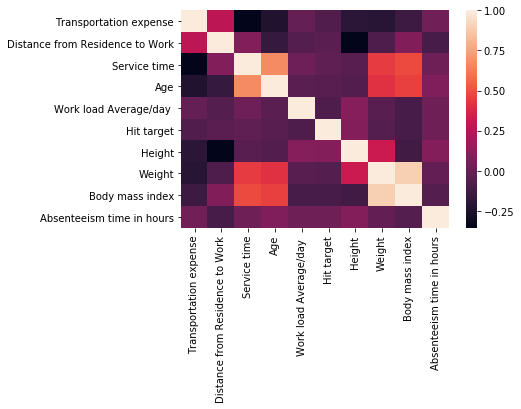

In [55]:
sns.heatmap(data[num_vars].corr())
data[num_vars].corr()

In [56]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  9
{'Education_4.0', 'Body mass index', 'Pet_2.0', 'Pet_4.0', 'Social drinker_0.8568506104180104', 'Pet_5.0', 'Son_3.0', 'Pet_8.0', 'Son_4.0'}


In [57]:
X_train.drop(labels = corr_features, axis=1, inplace = True)

In [59]:
X_train.shape

(711, 112)

In [36]:
#Inference:



### Dimensionality Reduction using PCA

In [68]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components = 100)
pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(explained_variance, decimals = 4)*100)
plt.plot(var1)
plt.show()

#explained_variance


ValueError: n_components=100 must be between 0 and min(n_samples, n_features)=45 with svd_solver='full'

#### Inference:
We can see that more than 98 % varaince is explained by 45 variables. So, we will reduce the components to 45.


In [90]:
pca = PCA(n_components = 45)
X = pca.fit(X_train).transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size = 0.2)

In [96]:
X_train.shape

293    0.000000
51     0.000000
256    0.008333
444    0.033333
176    0.008333
534    0.200000
355    0.016667
679    0.008333
465    0.066667
410    0.066667
223    0.033333
24     0.066667
432    0.016667
341    0.008333
622    0.933333
512    0.016667
140    0.016667
302    0.032242
147    0.016667
476    0.066667
640    0.016667
390    0.066667
420    1.000000
158    0.066667
98     0.008333
165    0.133333
435    0.025000
61     0.033333
729    1.000000
122    0.016667
         ...   
39     0.033333
529    0.066667
348    0.008333
490    0.033333
728    0.033333
554    0.016667
66     0.025000
414    0.033333
193    0.025000
655    0.066667
269    0.014921
154    0.066667
691    0.008333
211    0.008333
662    0.025000
224    0.147455
652    0.866667
114    0.008333
27     0.033333
661    0.016667
34     0.016667
398    0.133333
194    0.066667
417    0.066667
711    0.200000
181    0.016667
422    0.033333
674    0.066667
466    0.033333
1      0.000000
Name: Absenteeism time i

## Model Development

### Multiple Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)


In [93]:
print(math.sqrt(mean_squared_error(y_train,y_train_pred)))  #RMSE - Train data
print(math.sqrt(mean_squared_error(y_test,y_pred)))   #RMSE - Test data

0.11182532839365314
0.090098184860876


### Polynomial Regression

In [124]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_train)
y_train_pred = lin_reg2.predict(X_poly)

X_poly_test = poly_reg.fit_transform(X_test)
y_pred = lin_reg2.predict(X_poly_test)


In [125]:
print(math.sqrt(mean_squared_error(y_train,y_train_pred)))  #RMSE - Train data
print(math.sqrt(mean_squared_error(y_test,y_pred)))   #RMSE - Test data

0.007083344490853086
4266261306.636306


### Ridge Regression

In [77]:
from sklearn.linear_model import Ridge

for alpha_ in [0.01,0.1,1,5,10,15,20]:
    ridge = Ridge(alpha = alpha_)
    ridge_model = ridge.fit(X_train,y_train)
    y_pred = ridge_model.predict(X_test)
    
    print('RMSE for alpha: '+ str(alpha_) + ' is ' + str(math.sqrt(mean_squared_error(y_test,y_pred))))   #RMSE - Test data

RMSE for alpha: 0.01 is 0.08353809217823968
RMSE for alpha: 0.1 is 0.08353115197096901
RMSE for alpha: 1 is 0.08347799434117086
RMSE for alpha: 5 is 0.08347580681309237
RMSE for alpha: 10 is 0.0837180446158383
RMSE for alpha: 15 is 0.0840450732132887
RMSE for alpha: 20 is 0.08438865670502113


In [78]:
ridge = Ridge(alpha = 0.01)
ridge_model = ridge.fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
    
print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test,y_pred))))    #RMSE - Test data

RMSE: 0.08353809217823968


### Lasso Regression

In [80]:
from sklearn.linear_model import Lasso

for alpha_ in [0.001,0.01,0.1,1,5,10,15,200]:
    lasso = Lasso(alpha = alpha_)
    lasso_model = lasso.fit(X_train,y_train)
    y_pred = lasso_model.predict(X_test)
    
    print('RMSE for alpha: '+ str(alpha_) + ' is ' + str(math.sqrt(mean_squared_error(y_test,y_pred))))   #RMSE - Test data



RMSE for alpha: 0.001 is 0.08474804823958076
RMSE for alpha: 0.01 is 0.09418593348519644
RMSE for alpha: 0.1 is 0.09418593348519644
RMSE for alpha: 1 is 0.09418593348519644
RMSE for alpha: 5 is 0.09418593348519644
RMSE for alpha: 10 is 0.09418593348519644
RMSE for alpha: 15 is 0.09418593348519644
RMSE for alpha: 200 is 0.09418593348519644


In [81]:
lasso = Lasso(alpha = 0.001)
lasso_model = lasso.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)
print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test,y_pred))))   #RMSE - Test data

RMSE: 0.08474804823958076


### Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
params = {'n_estimators':500, 'max_depth':4, 'min_samples_split':2, 'learning_rate':0.01,'loss':'ls'}

gbr = GradientBoostingRegressor(**params)
gbr_model = gbr.fit(X_train,y_train)
y_train_pred = gbr_model.predict(X_train)
y_pred = gbr_model.predict(X_test)


In [118]:
print(math.sqrt(mean_squared_error(y_train,y_train_pred)))  #RMSE - Train data
print(math.sqrt(mean_squared_error(y_test,y_pred)))   #RMSE - Test data

0.03330030797129288
0.12679385341072996


## Comparing all models

In [122]:
models = ['Linear Regression','Polynomial Regression','Ridge Regression','Lasso Regression','Gradient Boosting']

model = pd.DataFrame(models)

,0
0,Linear Regression
1,Polynomial Regression
2,Ridge Regression
3,Lasso Regression
4,Gradient Boosting


In [123]:
df = pd.DataFrame({"rmse":['0.100955',],
                   "Model" : ['Linear Regression','Polynomial Regression','Ridge Regression','Lasso Regression','Gradient Boosting']})
print(df)

ValueError: arrays must all be same length